In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid SettingWithCopyWarning
pd.options.mode.copy_on_write = True

In [33]:
import re

# Data Preparation

This dataset is from the U.S. Department of Education College Scorecard: https://collegescorecard.ed.gov/data/. The College Scorecard project is designed to increase transparency, putting the power in the hands of
students and families to compare how well individual postsecondary institutions are preparing their
students to be successful. This data was provided to help students and families compare college costs
and outcomes as they weigh the tradeoffs of different colleges, accounting for their own needs and
educational goals. 

The data contains real records of institutional data with over 6400 observations.

In [71]:
# Loading up the dataset and setting the datatype of "OPEID" and "OPEID6" column to string
institution_data = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv', dtype={"OPEID": str, "OPEID6": str}, low_memory=False)

In [73]:
# Make a copy of the original dataset
institution_data_orig = institution_data.copy()

The next data contains real records of institutional data disaggregated by their field of study with about 230000 observations 

In [128]:
# Loading up the dataset and setting the datatype of "OPEID6" column to string
field_of_study_data = pd.read_csv('../data/Most-Recent-Cohorts-Field-of-Study.csv', dtype={"OPEID6": str}, low_memory=False)

In [129]:
# Make a copy of the original dataset
field_of_study_data_orig = field_of_study_data.copy()

## 1. Initial inspection

In [40]:
# Inspect the dataframe
institution_data

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,00100200,001002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,800.0,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,00105200,001052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1811.0,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,02503400,025034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,75.0,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,00105500,001055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,810.0,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,00100500,001005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1224.0,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,49178301,04270802,042708,Wilton Simpson Technical College,Brooksville,FL,346134904,Council on Occupational Education,https://hernandoschools.org/schools/stc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6480,49425001,02609404,026094,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,76.0,NaN,0.4651,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN
6481,49501301,04247201,042472,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,49501302,04247202,042472,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
field_of_study_data

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
0,100654.0,001002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,100654.0,001002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,100654.0,001002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,3.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,001002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,001002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,4.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229183,NaN,043006,Southeast New Mexico College,Public,1,5201,"Business/Commerce, General.",2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229184,NaN,043006,Southeast New Mexico College,Public,1,5203,Accounting and Related Services.,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229185,NaN,043006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229186,NaN,043006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


In [85]:
# Check the dimensions of the DataFrame
print(f'Institution data shape: {institution_data.shape}')
print(f'Field of study data shape: {field_of_study_data.shape}')

Institution data shape: (6484, 3305)
Field of study data shape: (229188, 174)


In [91]:
# Info about dimensions and data types of columns
print("Institution data info:")
print(institution_data.info())
print("\nField of study data info:")
print(field_of_study_data.info())

Institution data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Columns: 3305 entries, UNITID to MD_EARN_WNE_MALE1_P11
dtypes: float64(916), int64(15), object(2374)
memory usage: 163.5+ MB
None

Field of study data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229188 entries, 0 to 229187
Columns: 174 entries, UNITID to EARN_IN_STATE_5YR
dtypes: float64(3), int64(4), object(167)
memory usage: 304.3+ MB
None


## Summary Statistics

In [49]:
institution_data.describe()

,UNITID,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
count,6.484000e+03,6047.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,...,4894.000000,4285.000000,4712.000000,4931.000000,4468.000000,3550.000000,4675.000000,4690.000000,4894.000000,4285.000000
mean,2.261726e+06,1.960311,0.006169,0.788865,3.191703,1.836212,2.247224,2.057989,28.956354,4.642813,...,1455.479158,1107.202100,0.597479,38198.777124,46049.203894,52479.307324,41993.114652,40284.135821,38231.901921,49084.291015
std,7.805306e+06,0.901947,0.078307,0.408146,6.809394,1.084154,1.381255,0.832232,16.925459,2.180387,...,5179.034533,3232.508489,0.170466,14797.971002,14409.067180,15652.851538,15479.329063,15858.913214,15018.898024,17319.894343
min,1.006540e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,16.000000,0.128300,11508.000000,12410.000000,14098.000000,9834.000000,9978.000000,10586.000000,8364.000000
25%,1.742222e+05,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,3.000000,...,138.000000,120.000000,0.475175,28025.500000,37485.000000,43087.000000,31613.000000,28948.250000,27726.250000,38522.000000
50%,2.288965e+05,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,29.000000,5.000000,...,443.000000,350.000000,0.607500,35237.000000,44229.000000,50796.000000,39319.000000,37610.500000,35188.000000,46525.000000
75%,4.576172e+05,3.000000,0.000000,1.000000,2.000000,3.000000,4.000000,3.000000,42.000000,6.000000,...,1315.750000,1049.000000,0.733500,45039.500000,52847.000000,60273.500000,49587.000000,48274.750000,45173.250000,56888.000000
max,4.966450e+07,3.000000,1.000000,1.000000,52.000000,4.000000,4.000000,3.000000,78.000000,9.000000,...,143629.000000,72022.000000,0.955900,130914.000000,134484.000000,139763.000000,128900.000000,155413.000000,126750.000000,248999.000000


In [94]:
field_of_study_data.describe()

,UNITID,MAIN,CIPCODE,CREDLEV,IPEDSCOUNT1,IPEDSCOUNT2,DISTANCE
count,219079.000000,229188.000000,229188.000000,229188.000000,190264.000000,194383.000000,229188.000000
mean,202261.491435,0.955883,3321.287332,3.269547,27.869445,27.830011,1.080790
std,87098.757168,0.205355,1712.980303,1.914634,96.913120,100.235987,0.740192
min,100654.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000
25%,149231.000000,1.000000,1433.000000,2.000000,1.000000,1.000000,1.000000
50%,187532.000000,1.000000,4001.000000,3.000000,7.000000,7.000000,1.000000
75%,220978.000000,1.000000,5107.000000,5.000000,23.000000,23.000000,1.000000
max,497338.000000,1.000000,6127.000000,8.000000,9082.000000,9606.000000,3.000000


In [51]:
# Data types of columns
institution_data.dtypes

UNITID                      int64
OPEID                      object
OPEID6                     object
INSTNM                     object
CITY                       object
                           ...   
MD_EARN_WNE_INC3_P11      float64
MD_EARN_WNE_INDEP0_P11    float64
MD_EARN_WNE_INDEP1_P11    float64
MD_EARN_WNE_MALE0_P11     float64
MD_EARN_WNE_MALE1_P11     float64
Length: 3305, dtype: object

In [96]:
# Data types of columns
field_of_study_data.dtypes

UNITID                       float64
OPEID6                        object
INSTNM                        object
CONTROL                       object
MAIN                           int64
                              ...   
EARN_MALE_WNE_MDN_5YR         object
EARN_COUNT_NOMALE_WNE_5YR     object
EARN_NOMALE_WNE_MDN_5YR       object
EARN_COUNT_HIGH_CRED_5YR      object
EARN_IN_STATE_5YR             object
Length: 174, dtype: object

## 2. Selecting / removing columns

### Institution data

In [99]:
# Keep the important columns we need for our research purpose

mini_institution_data = pd.DataFrame()

columns_to_keep = ["OPEID", "INSTNM", "STABBR", "MAIN", "PREDDEG", "HIGHDEG", "HBCU", "PBI", "ANNHI", "TRIBAL", "AANAPII", "HSI", "NANTI",
                  "BBRR1_FED_PELL_PAIDINFULL", "C150_4_BLACK", "PELL_DEBT_MDN", "NOPELL_DEBT_MDN", "IRPS_BLACK", "BBRR2_FED_PELL_PAIDINFULL", 
                  "BBRR3_FED_PELL_PAIDINFULL", "BBRR4_FED_PELL_PAIDINFULL", "BBRR1_PP_PELL_PAIDINFULL", "BBRR2_PP_PELL_PAIDINFULL", "BBRR3_PP_PELL_PAIDINFULL",
                  "BBRR4_PP_PELL_PAIDINFULL", "BBRR1_FED_NOPELL_PAIDINFULL", "BBRR2_FED_NOPELL_PAIDINFULL", "BBRR3_FED_NOPELL_PAIDINFULL", 
                  "BBRR4_FED_NOPELL_PAIDINFULL", "BBRR1_PP_NOPELL_PAIDINFULL", "BBRR2_PP_NOPELL_PAIDINFULL", "BBRR3_PP_NOPELL_PAIDINFULL", 
                  "BBRR4_PP_NOPELL_PAIDINFULL", "BBRR1_FED_PELL_DFLT", "BBRR2_FED_PELL_DFLT", "BBRR3_FED_PELL_DFLT", "BBRR4_FED_PELL_DFLT",
                  "BBRR1_FED_NOPELL_DFLT", "BBRR2_FED_NOPELL_DFLT", "BBRR3_FED_NOPELL_DFLT", "BBRR4_FED_NOPELL_DFLT", "FTFTPCTPELL", "C150_4_PELL",
                  "MD_EARN_WNE_1YR", "PCTPELL", "NOPELL_DEBT_MDN"]

for col in columns_to_keep:
    mini_institution_data[col] = institution_data[col]

In [101]:
# Set mini_institution_data to institution_data
institution_data = mini_institution_data

institution_data

,OPEID,INSTNM,STABBR,MAIN,PREDDEG,HIGHDEG,HBCU,PBI,ANNHI,TRIBAL,...,BBRR3_FED_PELL_DFLT,BBRR4_FED_PELL_DFLT,BBRR1_FED_NOPELL_DFLT,BBRR2_FED_NOPELL_DFLT,BBRR3_FED_NOPELL_DFLT,BBRR4_FED_NOPELL_DFLT,FTFTPCTPELL,C150_4_PELL,MD_EARN_WNE_1YR,PCTPELL
0,00100200,Alabama A & M University,AL,1,3,4,1.0,0.0,0.0,0.0,...,0.20-0.24,0.20-0.24,<=0.05,0.05-0.09,0.10-0.14,0.15-0.19,0.6740,0.2465,35983.0,0.6536
1,00105200,University of Alabama at Birmingham,AL,1,3,4,0.0,0.0,0.0,0.0,...,0.07,0.07,0.00,0.02,0.03,0.03,0.3829,0.5593,48854.0,0.3308
2,02503400,Amridge University,AL,1,3,4,0.0,0.0,0.0,0.0,...,<=0.20,<=0.20,<=0.20,<=0.20,<=0.20,<=0.20,NaN,NaN,43600.0,0.7769
3,00105500,University of Alabama in Huntsville,AL,1,3,4,0.0,0.0,0.0,0.0,...,0.07-0.08,0.07-0.08,<=0.01,<=0.02,0.03-0.04,0.03-0.04,0.2024,0.5041,59815.0,0.2173
4,00100500,Alabama State University,AL,1,3,4,1.0,0.0,0.0,0.0,...,0.20-0.24,0.20-0.24,<=0.05,0.05-0.09,0.05-0.09,0.10-0.14,0.7829,0.2650,29446.0,0.6976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,04270802,Wilton Simpson Technical College,FL,0,0,0,NaN,NaN,NaN,NaN,...,PS,PS,PS,PS,PS,PS,NaN,NaN,NaN,NaN
6480,02609404,Valley College - Fairlawn - School of Nursing,OH,0,0,0,NaN,NaN,NaN,NaN,...,PS,PS,PS,PS,PS,PS,NaN,NaN,25257.0,NaN
6481,04247201,Western Maricopa Education Center - Southwest ...,AZ,0,0,0,NaN,NaN,NaN,NaN,...,NaN,PS,PS,NaN,NaN,PS,NaN,NaN,NaN,NaN
6482,04247202,Western Maricopa Education Center - Northeast ...,AZ,0,0,0,NaN,NaN,NaN,NaN,...,NaN,PS,PS,NaN,NaN,PS,NaN,NaN,NaN,NaN


In [103]:
# Check the number of columns of our institution_data dataset
institution_data.shape

(6484, 45)

We had 3305 entries, most of which are object datatypes. Most of these entries are not important for our research, so unnecessary and redundant columns were manually removed. Hence, the number of entries were reduced to 45 entries. New variables will be created as the research continues to allow for easier access. One such example may be to reassign some colleges a PWI indicator to differentiate between the other racially categorized schools. No observations were removed, even when some of their entries included NaN values, simply because they may have some research significance as our process continues.

### Field of Study Data

In [132]:
# Keep the important columns we need for our research purpose

mini_field_of_study_data = pd.DataFrame()

columns_to_keep = ["OPEID6", "INSTNM", "CONTROL", "MAIN", "CIPCODE", "CIPDESC", "CREDDESC", "BBRR1_FED_COMP_PAIDINFULL", "BBRR2_FED_COMP_PAIDINFULL",
                  "BBRR3_FED_COMP_PAIDINFULL", "BBRR4_FED_COMP_PAIDINFULL", "EARN_COUNT_PELL_WNE_1YR", "EARN_COUNT_PELL_WNE_4YR", "EARN_COUNT_PELL_WNE_5YR",
                  "EARN_COUNT_NOPELL_WNE_1YR", "EARN_COUNT_NOPELL_WNE_4YR", "EARN_COUNT_NOPELL_WNE_5YR", "EARN_PELL_WNE_MDN_1YR", "EARN_PELL_WNE_MDN_4YR",
                  "EARN_PELL_WNE_MDN_5YR", "EARN_NOPELL_WNE_MDN_1YR", "EARN_NOPELL_WNE_MDN_4YR", "EARN_NOPELL_WNE_MDN_5YR"]

for col in columns_to_keep:
    mini_field_of_study_data[col] = field_of_study_data[col]

In [134]:
# Set mini_field_of_study_data to field_of_study_data
field_of_study_data = mini_field_of_study_data

field_of_study_data

,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDDESC,BBRR1_FED_COMP_PAIDINFULL,BBRR2_FED_COMP_PAIDINFULL,BBRR3_FED_COMP_PAIDINFULL,...,EARN_COUNT_PELL_WNE_5YR,EARN_COUNT_NOPELL_WNE_1YR,EARN_COUNT_NOPELL_WNE_4YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_PELL_WNE_MDN_1YR,EARN_PELL_WNE_MDN_4YR,EARN_PELL_WNE_MDN_5YR,EARN_NOPELL_WNE_MDN_1YR,EARN_NOPELL_WNE_MDN_4YR,EARN_NOPELL_WNE_MDN_5YR
0,001002,Alabama A & M University,Public,1,100,"Agriculture, General.",Bachelor's Degree,PS,PS,PS,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,001002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,Bachelor's Degree,PS,NaN,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,001002,Alabama A & M University,Public,1,109,Animal Sciences.,Bachelor's Degree,PS,PS,PS,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,001002,Alabama A & M University,Public,1,110,Food Science and Technology.,Bachelor's Degree,PS,PS,PS,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,001002,Alabama A & M University,Public,1,110,Food Science and Technology.,Master's Degree,PS,PS,PS,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229183,043006,Southeast New Mexico College,Public,1,5201,"Business/Commerce, General.",Associate's Degree,NaN,NaN,NaN,...,PS,PS,NaN,PS,PS,NaN,PS,PS,NaN,PS
229184,043006,Southeast New Mexico College,Public,1,5203,Accounting and Related Services.,Undergraduate Certificate or Diploma,NaN,NaN,NaN,...,PS,PS,NaN,PS,PS,NaN,PS,PS,NaN,PS
229185,043006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,Undergraduate Certificate or Diploma,NaN,NaN,NaN,...,PS,PS,NaN,PS,PS,NaN,PS,PS,NaN,PS
229186,043006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,Associate's Degree,NaN,NaN,NaN,...,PS,PS,NaN,PS,PS,NaN,PS,PS,NaN,PS


In [136]:
# Check the number of columns of our field_of_study_data dataset
field_of_study_data.shape

(229188, 23)

We've reduced the number of entries from 174 to 23

## Save the Data

In [143]:
institution_data.to_csv("institution_data.csv")
field_of_study_data.to_csv("field_of_study_data_cleaned.csv")

# Data Exploration

In [18]:
df = institution_data.copy()

In [19]:
df['Institution Type'] = df['HBCU'].apply(lambda x: 'HBCU' if x==1.0 else 'Non-HBCU')

In [38]:
sns.set_palette("colorblind")
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

###  Plot 1: Average Pell Debt Median by Institution Type

This compares the median debt levels for Pell Grant students across HBCUs and non-HBCUs and highlights potential differences in the financial burden between the two institution types, addressing part of our hypothesis on financial disparities.

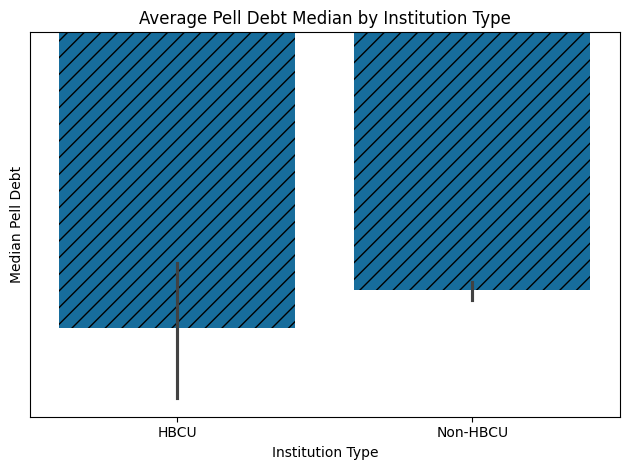

In [41]:
ax = sns.barplot(x='Institution Type', y='PELL_DEBT_MDN', data=df)
plt.title('Average Pell Debt Median by Institution Type')
plt.ylabel('Median Pell Debt')
plt.xlabel('Institution Type')
plt.yticks([]) 
plt.subplots_adjust(left=0.25)
plt.tight_layout()

for bar in ax.patches:
    bar.set_hatch('//')

# alt: Bar plot showing the average median Pell debt by institution type, using a color-blind friendly palette and diagonal hatching for texture.
plt.show()

### Plot 2: Boxplot of 150% Completion Rate for Pell students (C150_4_PELL) by Institution Type

We use a boxplot to show the spread of 150% completion rates, an indicator of student retention or graduation performance, by institution type. Helps reveal the variance and potential outliers in completion rates, offering insight into institutional performance and how it may relate to loan repayment success.

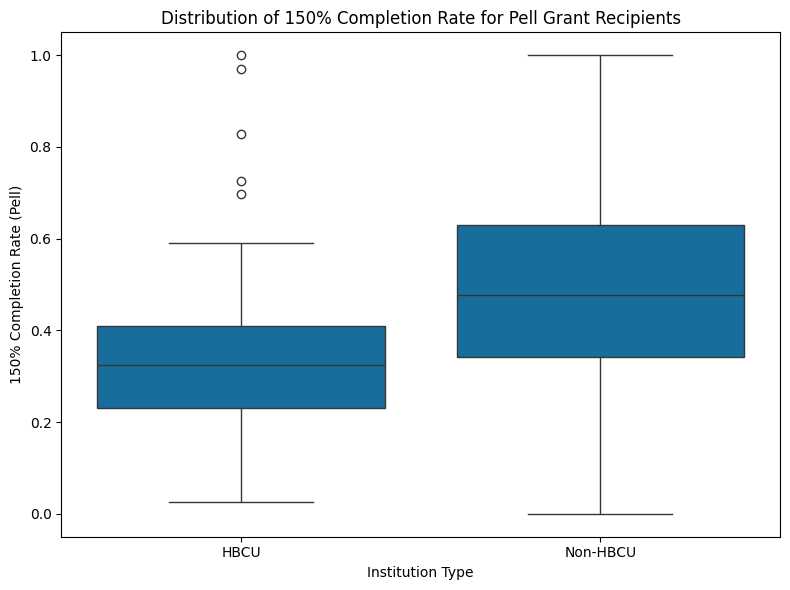

In [42]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Institution Type', y='C150_4_PELL', data=df)
plt.title('Distribution of 150% Completion Rate for Pell Grant Recipients')
plt.ylabel('150% Completion Rate (Pell)')
plt.xlabel('Institution Type')
plt.tight_layout()

# alt: Box plot depicting the distribution of the 150% completion rate for Pell Grant recipients across different institution types with a color-blind friendly palette.
plt.show()

### Plot 3: Scatter plot of Median Earnings vs. Pell Debt Median for Pell Grant Recipients

This displays the relationship between Pell debt levels and post-graduation earnings, with institutions differentiated by type. It helps us in exploring whether higher debt is linked to lower or higher earnings, which is key to understanding the financial outcomes for Pell Grant students.

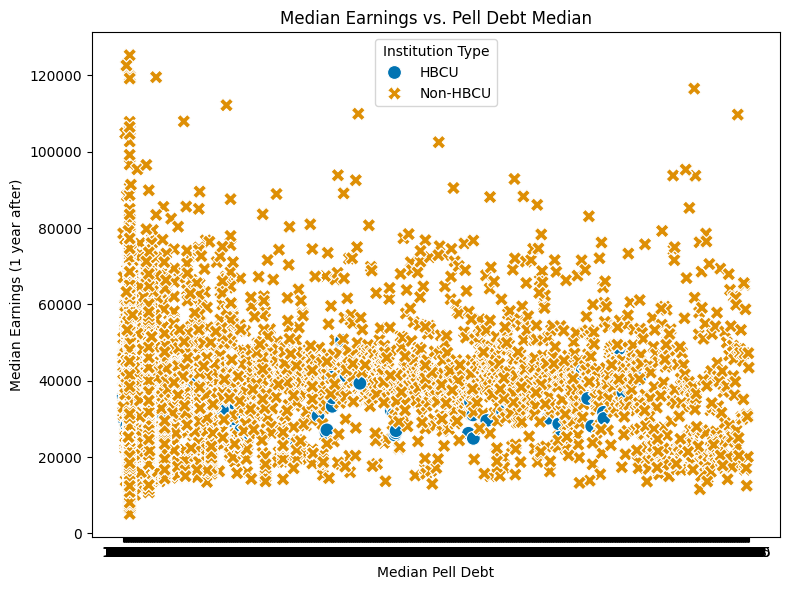

In [43]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='PELL_DEBT_MDN', y='MD_EARN_WNE_1YR', hue='Institution Type', style='Institution Type', data=df, s=100)
plt.title('Median Earnings vs. Pell Debt Median')
plt.xlabel('Median Pell Debt')
plt.ylabel('Median Earnings (1 year after)')
plt.tight_layout()

# alt: Scatter plot comparing median earnings (1 year after) and median Pell debt, with points differentiated by institution type using both colors and marker shapes.
plt.show()

### Plot 4: Bar plot of Average Percentage Pell (PCTPELL) by Institution Type

This compares the proportion of Pell Grant recipients in HBCUs versus non-HBCUs.It provides a snapshot of how these student populations differ across institution types, helping contextualize our analysis of financial support and outcomes.

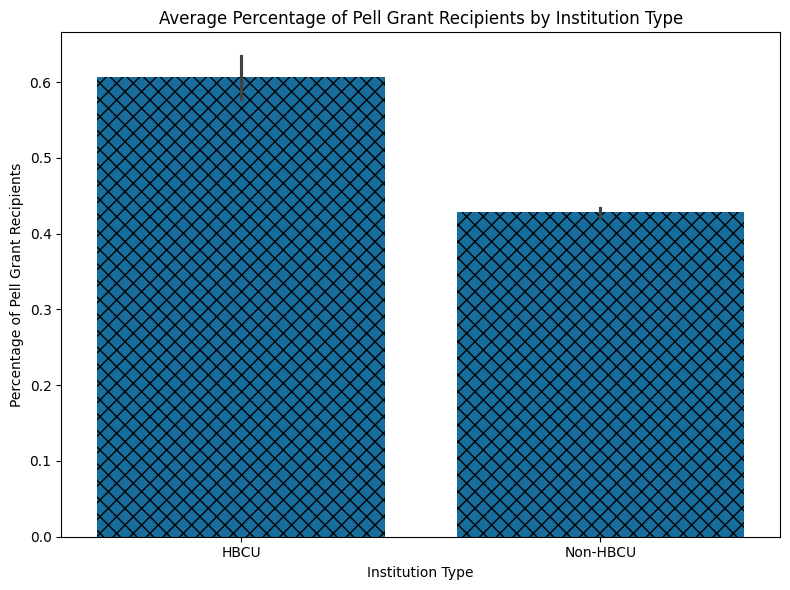

In [44]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Institution Type', y='PCTPELL', data=df)
plt.title('Average Percentage of Pell Grant Recipients by Institution Type')
plt.ylabel('Percentage of Pell Grant Recipients')
plt.xlabel('Institution Type')
plt.tight_layout()

for bar in ax.patches:
    bar.set_hatch('xx')

# alt: Bar plot illustrating the average percentage of Pell Grant recipients by institution type, with a color-blind friendly palette and cross-hatching to enhance visibility in black and white.
plt.show()

## Outcome and Explanatory Variables

The primary outcome variables in this research include the loan default rate among Pell Grant recipients, the percentage of Pell recipients at each institution, the amount of loan debt taken on by Pell students, their post-graduation earnings, and the loan repayment completion rate. These variables  measure the financial outcomes and burdens experienced by Pell students and are aligned with the goals of the analysis. For instance, default and repayment rates offer insight into financial stress , while earnings and debt levels help assess return on investment across institution types. These outcomes are expected to differ between HBCUs and non-HBCUs due to differences in  institutional resources. 

The key explanatory variable across all questions is the university type, specifically, whether an institution is an HBCU or not. Other important explanatory factors include the student’s field of study, and the amount of loan debt when evaluating its relationship to repayment or earnings outcomes. Together, these variables help us perform comprehensive comparison of financial outcomes for Pell Grant students across different kind of instutions.